<a href="https://colab.research.google.com/github/Leeonejae6708/python_itwill/blob/main/Python22_itwill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 패키지, 모듈 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame Concat

In [ ]:
np.random.seed(42)
df1 = pd.DataFrame(data={
  'id': np.arange(1, 6),
  'korean':np.random.randint(101, size=5),    # [0,101) 범위의 정수 난수 5개로 이루저인 배열
  'english':np.random.randint(101, size=5)
})
df1

,id,korean,english
0,1,51,20
1,2,92,82
2,3,14,86
3,4,71,74
4,5,60,74


In [ ]:
df2 = pd.DataFrame(data={
  'id': np.arange(6, 11),
  'korean':np.random.randint(101, size=5),    # [0,101) 범위의 정수 난수 5개로 이루저인 배열
  'english':np.random.randint(101, size=5)
})
df2

,id,korean,english
0,6,87,52
1,7,99,1
2,8,23,87
3,9,2,29
4,10,21,37


In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df

,id,korean,english
0,1,51,20
1,2,92,82
2,3,14,86
3,4,71,74
4,5,60,74
5,6,87,52
6,7,99,1
7,8,23,87
8,9,2,29
9,10,21,37


# babynames 데이터셋

In [ ]:
col_names = ['name', 'gender', 'births']
file_path = 'https://raw.githubusercontent.com/BrambleXu/pydata-notebook/refs/heads/master/datasets/babynames/yob1880.txt'
yob1880 = pd.read_csv(file_path, names=col_names)
yob1880['year'] = 1880         # 데이터셋 yob1880에 새로운 컬럼 year 추가

In [ ]:
yob1880.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yob1880.tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


In [ ]:
yobs=[]                                       # 연도별 데이터프레임들을 저장할 리스트
col_names = ['name', 'gender', 'births']      # 데이터프레임의 컬럼 이름
for year in range(1880, 2011):
  # github에 저장된 파일 경로
  file_path = f'https://raw.githubusercontent.com/BrambleXu/pydata-notebook/refs/heads/master/datasets/babynames/yob{year}.txt'

  # github에 저장된 csv 파일을 읽어서 데이터프레임 생성
  yob_year = pd.read_csv(file_path, names=col_names)

  # 생성된 데이터프레임에 year컬럼 추가
  yob_year['year'] = year

  # 리스트에 데이터프레임을 추가
  yobs.append(yob_year)

In [ ]:
# 리스트의 원소 개수
print(len(yobs))

131


In [ ]:
print(type(yobs[-1]))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
yobs[0].head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yobs[0].tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


In [ ]:
yobs[-1].head()

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


In [ ]:
yobs[-1].tail()

,name,gender,births,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


데이터프레임들의 리스트를 하나의 데이터프레임으로 concat

In [ ]:
yob_df = pd.concat(yobs, ignore_index=True)

In [ ]:
yob_df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yob_df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [ ]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## 연도별 신생아 수

In [178]:
birth_year = yob_df.groupby(by=['year']).sum('births')
birth_year

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466
...,...
2006,3946702
2007,3986130
2008,3915955


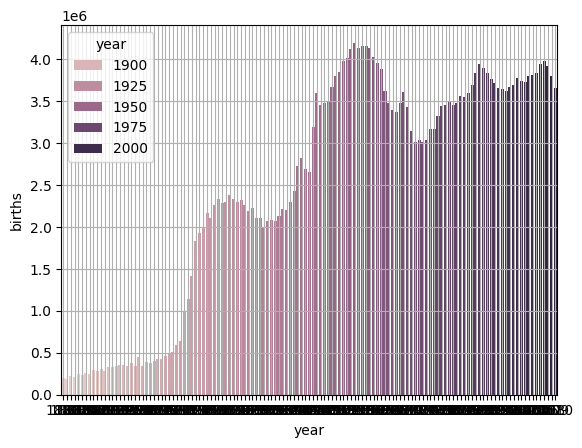

In [185]:
sns.barplot(data=birth_year, x='year', y='births', hue='year', estimator='max')
plt.grid()
plt.show()

In [ ]:
births_by_year = yob_df.groupby(by=['year']).births.sum()
births_by_year

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466
...,...
2006,3946702
2007,3986130
2008,3915955


In [ ]:
print(type(births_by_year))

<class 'pandas.core.series.Series'>


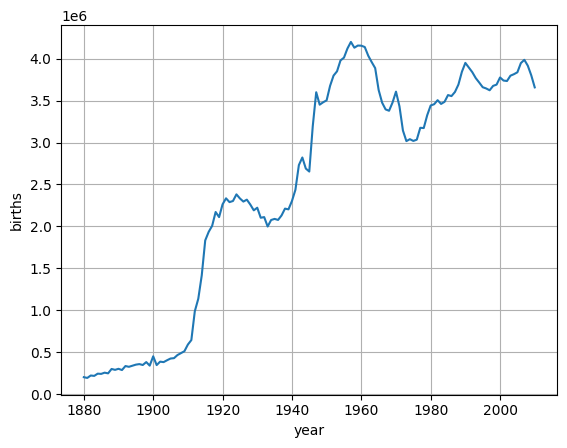

In [ ]:
sns.lineplot(x=births_by_year.index, y=births_by_year)
plt.grid()
plt.show()

`groupby()`  함수를 호출할 때 그룹을 설정하는 변수(컬럼 이름)를 인덱스가 아닌 컬럼으로 만들기

In [ ]:
yob_df.groupby(by=['year'], as_index=False).births.sum()

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


시리즈(Series) 또는 데이터프레임(DataFrame) 의 인덱스(행 레이블)을 컬럼으로 변환

In [ ]:
births_by_year.reset_index()

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


## 연도별 성별 신생아 수

In [ ]:
yob_df.groupby(by=['year', 'gender']).sum('birth')

births
year gender         
1880 F         90993
     M        110493
1881 F         91955
     M        100748
1882 F        107851
...              ...
2008 M       2032310
2009 F       1827643
     M       1973359
2010 F       1759010
     M       1898382

[262 rows x 1 columns]

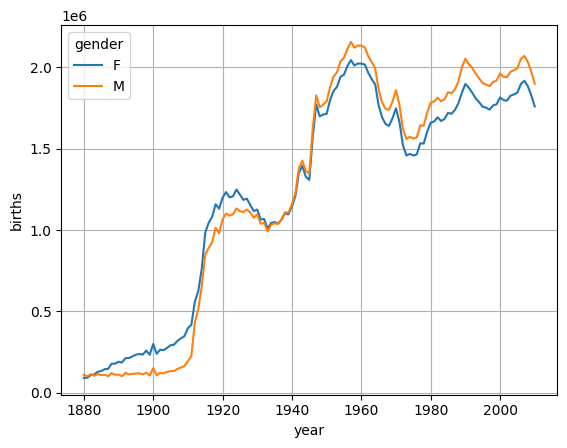

In [ ]:
sns.lineplot(data=yob_df.groupby(by=['year', 'gender']).sum('births'), x='year', y='births', hue='gender')
plt.grid()
plt.show()

In [ ]:
births_by_year_gender = yob_df.groupby(by=['year', 'gender']).births.sum()
births_by_year_gender

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [ ]:
births_by_year_gender.index

MultiIndex([(1880, 'F'),
            (1880, 'M'),
            (1881, 'F'),
            (1881, 'M'),
            (1882, 'F'),
            (1882, 'M'),
            (1883, 'F'),
            (1883, 'M'),
            (1884, 'F'),
            (1884, 'M'),
            ...
            (2006, 'F'),
            (2006, 'M'),
            (2007, 'F'),
            (2007, 'M'),
            (2008, 'F'),
            (2008, 'M'),
            (2009, 'F'),
            (2009, 'M'),
            (2010, 'F'),
            (2010, 'M')],
           names=['year', 'gender'], length=262)

In [ ]:
yob_df.groupby(by=['year', 'gender'], as_index=False).births.sum()

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [ ]:
births_df = births_by_year_gender.reset_index()
# -> reset_index()에서 argument를 전달하지 않으면 모든 다중 인덱스(multiindex)들을 컬럼으로 변환
births_df

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [ ]:
births_df = births_by_year_gender.reset_index(level=1)
# -> 다중 인덱스(multiindex)들 중에서 level이 1인 인덱스만 컬럼으로 변환
births_df

,gender,births
year,,
1880,F,90993
1880,M,110493
1881,F,91955
1881,M,100748
1882,F,107851
...,...,...
2008,M,2032310
2009,F,1827643
2009,M,1973359


In [ ]:
births_df = births_by_year_gender.reset_index(level='gender')
# -> reset_index() 함수의 level 파라미터
## (1): level 숫자값(인덱스) >> 0부터 시작하는 정수
## (2): 인덱스 이름
births_df

,gender,births
year,,
1880,F,90993
1880,M,110493
1881,F,91955
1881,M,100748
1882,F,107851
...,...,...
2008,M,2032310
2009,F,1827643
2009,M,1973359


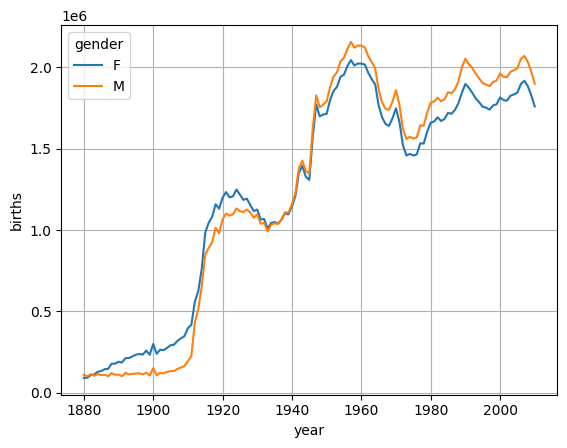

In [ ]:
sns.lineplot(data=births_df, x='year', y='births', hue='gender')
plt.grid()
plt.show()